# Gradient Descent

Update values of the weights, where $\eta$ is the learning rate.

$w^0$<br>
$w^1 = w^0 - \eta \frac{dl(w^1)}{dw}$<br>
$w^{k+1} = w^k - \eta \frac{dl(w^k)}{dw}$<br>

## Loss function

$$l(w,b) = \frac{1}{N} \sum_{n=1}^{N}(y_n - wx_n + b)^2$$

# Training Parameters

In [1]:
%matplotlib inline
import torch
from matplotlib import pyplot as plt

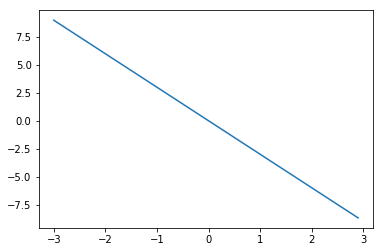

In [13]:
w = torch.tensor(-10.0, requires_grad=True)
X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3*X

plt.plot(X.numpy(), f.numpy())
plt.show()

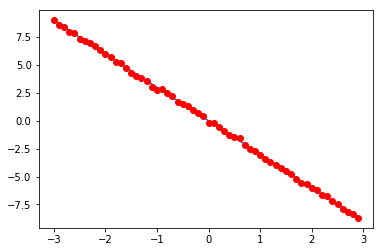

In [14]:
# Add random noise
Y = f + 0.1*torch.randn(X.size())

plt.plot(X.numpy(), f.numpy())
plt.plot(X.numpy(), Y.numpy(),'ro')
plt.show()

### Forward function

$\hat{y} = wx$

In [5]:
def forward(x):
    y = w*x
    return y

### Criterion function

$l(w) = \frac{1}{N} \sum_{n=1}^N (y_n - wx_n)^2$

In [6]:
def criterion(yhat, y):
    return torch.mean((yhat - y)**2)

### Update gradients

$w^{k+1} = w^{k} - \eta\frac{dl(w^k)}{dw}$

In [15]:
EPOCHS = 3

lr = 0.1
LOSS=[]

for epoch in range(EPOCHS+1):
    Yhat = forward(X)
    # calculate loss
    loss = criterion(Yhat, Y)
    # get the gradients
    loss.backward()
    # update weights
    w.data = w.data - lr*(w.grad.data)
    # reset gradients
    w.grad.data.zero_()
    # accumulate the loss for checking
    LOSS.append(loss)

In [16]:
LOSS

[tensor(147.1252, grad_fn=<MeanBackward1>),
 tensor(23.5103, grad_fn=<MeanBackward1>),
 tensor(3.7648, grad_fn=<MeanBackward1>),
 tensor(0.6108, grad_fn=<MeanBackward1>)]

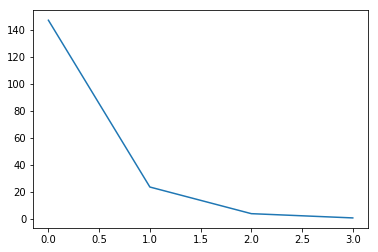

In [17]:
plt.plot(range(EPOCHS+1), LOSS)
plt.show()

# Training with Slope and Bias

### Forward function

$\hat{y} = wx + b$


### Criterion function

$l(w) = \frac{1}{N} \sum_{n=1}^N (y_n - (wx_n + b))^2$

In [18]:
def forward(x):
    y = w*x + b
    return y

def criterion(yhat, y):
    return torch.mean((yhat - y)**2)

In [19]:
w = torch.tensor(-10.0, requires_grad=True)
b = torch.tensor(5.0, requires_grad=True)
X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3*X

In [20]:
EPOCHS = 15

lr = 0.1
LOSS=[]

for epoch in range(EPOCHS+1):
    Yhat = forward(X)
    # calculate loss
    loss = criterion(Yhat, Y)
    # get the gradients
    loss.backward()
    # update weights
    w.data = w.data - lr*(w.grad.data)
    w.grad.data.zero_()
    
    b.data = b.data - lr*(b.grad.data)
    b.grad.data.zero_()
    # accumulate the loss for checking
    LOSS.append(loss)

In [21]:
LOSS

[tensor(175.8203, grad_fn=<MeanBackward1>),
 tensor(39.3239, grad_fn=<MeanBackward1>),
 tensor(13.4970, grad_fn=<MeanBackward1>),
 tensor(6.7825, grad_fn=<MeanBackward1>),
 tensor(4.0499, grad_fn=<MeanBackward1>),
 tensor(2.5500, grad_fn=<MeanBackward1>),
 tensor(1.6293, grad_fn=<MeanBackward1>),
 tensor(1.0461, grad_fn=<MeanBackward1>),
 tensor(0.6737, grad_fn=<MeanBackward1>),
 tensor(0.4353, grad_fn=<MeanBackward1>),
 tensor(0.2827, grad_fn=<MeanBackward1>),
 tensor(0.1849, grad_fn=<MeanBackward1>),
 tensor(0.1223, grad_fn=<MeanBackward1>),
 tensor(0.0823, grad_fn=<MeanBackward1>),
 tensor(0.0566, grad_fn=<MeanBackward1>),
 tensor(0.0401, grad_fn=<MeanBackward1>)]

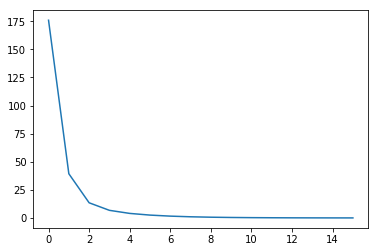

In [22]:
plt.plot(range(EPOCHS+1), LOSS)
plt.show()